# ME 7160 - Harmonic Balance Project
- Due Date: 12/15
### Contributors


- Admir Makas
- Shashankashekhar Dutta
- Alec Blankenship

# Overview

The objective of this study is to utilize **Method of Harmonic Balance (MHB)** to find a solution of a harmonically excited system.
The procedure involves finding a solution using FFT and comparing it with an analytical\numerical solution. Python is used as the primary software platform for coding the solver routines.

The method is programmed using the following sequence:

1. Define number of sample points (N).
2. Identify initial guess (1xN-1 matrix), in most cases just 1.
3. Define fourier transform frequencies given with the given sample size (N).
4. Take FFT of initial guess matrix ($x_0$). This step done in order to perform differentiation in frequency domain.
5. Take IFFT of resultant $\dot{X}$ and $\ddot{X}$ to determine corresponding time derivatives $\dot{x}$ and $\ddot{x}$.
6. Substitute back into governing equation and define residual function.
7. Use optimization scheme to minimize the residual and determine a one period, steady state solution to the nonlinear system.

Note:  
Using this perterbation method results in a solution that is only obtained over one period and at steady state.

Four oscilitory systems have been included in this study to exhibit the application of the method of Harmonic Balance. The problems reviewed consist of both linear and nonlinear systems. The duffing equation and Van der pol oscillator were among the systems studied.

# Solution to linear model

#### Following linear equation was solved as a verification of the method

## $$\ddot{x} + \dot{x} + x = cos(2t)sin(5t)$$

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = Acos(2t)cos(5t) + Bsin(2t)sin(5t) + Ccos(2t)sin(5t) + Dsin(2t)cos(5t)$**, where

- A = $\frac{-3785}{171769}$


- B = $\frac{-3274}{171769}$


- C = $\frac{-11164}{171769}$


- D = $\frac{7660}{171769}$

Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 72
         Function evaluations: 7526
         Gradient evaluations: 106
Values of x after optimization:
[-0.02414128 -0.04394068 -0.0583228  -0.06528926 -0.06466665 -0.0579845
 -0.04777935 -0.03660501 -0.02613744 -0.01671774 -0.00749777  0.00288949
  0.01542309  0.02993447  0.04482104  0.0573718   0.06459947  0.06426971
  0.05573378  0.0402411   0.02060445  0.000338   -0.01741154 -0.0307438
 -0.03937507 -0.04438239 -0.04744928 -0.04993389 -0.05214549 -0.05312776
 -0.05104081 -0.04399171 -0.03097902 -0.01256573  0.00900458  0.03031894
  0.04776023  0.05857518  0.06165184  0.05772379  0.04893796  0.03796664
  0.02701574  0.01711434  0.00795323 -0.00168233 -0.0130786  -0.02671216
 -0.04169541 -0.05579392 -0.06603322 -0.06967699 -0.06520636 -0.05292297
 -0.03493833 -0.01454575  0.00479348  0.02047221  0.03139136  0.03801646
  0.04184223  0.04450171  0.04689235  0.04867956  0.04838325  0.0

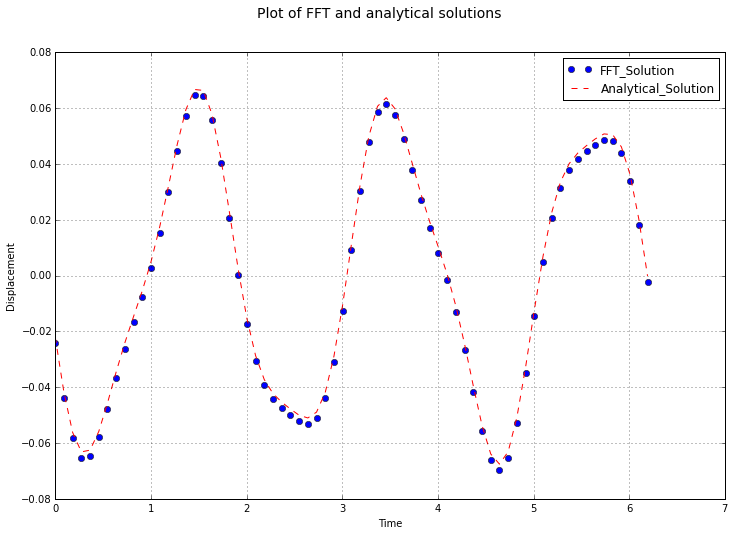

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

A = (-3785/171769)
B = (-3274/171769)
C = (-11164/171769)
D = (7660/171769)

Analytical = (A)*np.cos(2*t)*np.cos(5*t) + (B)*np.sin(2*t)*np.sin(5*t) + (C)*np.cos(2*t)*np.sin(5*t)\
            + (D)*np.sin(2*t)*np.cos(5*t)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot(t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(t, Analytical, 'r--', label = 'Analytical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of FFT and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

Numerical results in the above plot match well with the analytical solution. There is a small deviation between two results especially at the peaks:

- Optimization function error.
- Initial guess for the optimizer was a vector of ones. Better guess could further improve the results.

# Solution to Duffing Equation with Forcing Term:

The following is an equation for the duffing oscillator with a unique forcing function. The MHB is used and plotted with the numerical solution to determine accuracy. The equation is given as:

## $$\ddot{x} + \dot{x} + x + x^3 = cos(2t)sin(5t)$$



Optimization terminated successfully.
         Current function value: 0.000074
         Iterations: 78
         Function evaluations: 6832
         Gradient evaluations: 112
Values of x after optimization:
[-0.02313843 -0.04583568 -0.06056589 -0.06486111 -0.05965213 -0.04845004
 -0.03540769 -0.02329764 -0.0124612  -0.00124314  0.01238109  0.02892433
  0.04633235  0.06039297  0.066462    0.06164217  0.04628775  0.02403902
  0.00034654 -0.0197774  -0.03365255 -0.04154337 -0.0457475  -0.04872105
 -0.05130159 -0.0520195  -0.0478879  -0.03625102 -0.0166836   0.00811595
  0.0329796   0.0522022   0.06180999  0.06103908  0.05230256  0.03970742
  0.02692899  0.01556557  0.00481502 -0.00740849 -0.02257984 -0.03997522
 -0.05631459 -0.06689939 -0.06770323 -0.05734741 -0.03792857 -0.0142496
  0.00817209  0.02531821  0.03600382  0.0417056   0.04505576  0.04787351
  0.04983613  0.04853162  0.04087718  0.0251366   0.00242781]


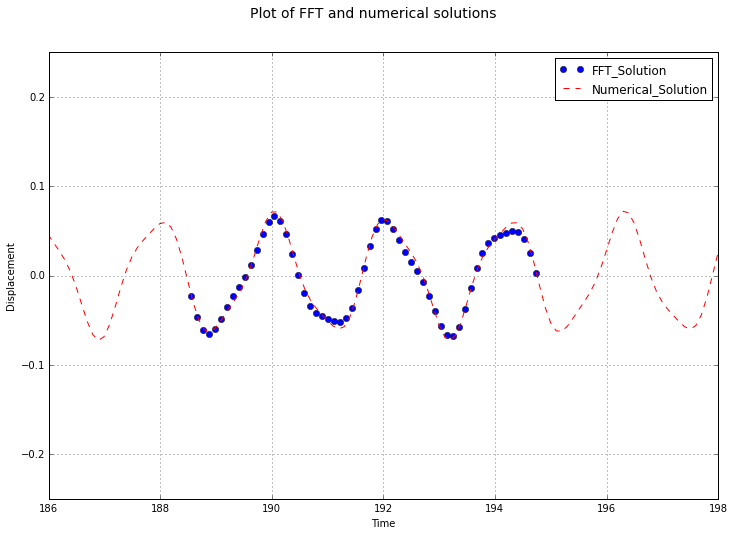

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 60 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t = t[0:-1]


x0=1*np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x + x**3 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution for comparison
from scipy.integrate import odeint

def deriv(x, t):
    return np.array([x[1], -0.25*x[1] - x[0] - x[0]**3 + np.cos(2*t)*np.sin(5*t)])

time = np.linspace(0.0, 200, 2000)
xinit=np.array([0,0])
x = odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((60.02*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:, 0], 'r--', label = 'Numerical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of FFT and numerical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([186, 198, -0.25, 0.25])
plt.grid()
plt.show()

Numerical results in the above plot match well with numerical integration results. There is a small deviation between two results especially at the peaks:

- Optimization function error.
- Small aspects of the transient response is still present in the numerical integration solution at the 180 second mark.
- Initial guess for the optimizer was a vector of ones. Better guess could further improve the results.

# Solution to Van der Pol oscilator #1:
This example is for the Van der Pol oscilator. The ODE describing the system is given below with a unique forcing function. Again, the MHB approach is used to approximate the solution and plotted with a numerical solution to verify accuracy.

## $$\ddot{x} + (x^2 - 1)\dot{x} + x = cos(t)sin(4t)$$

         Current function value: 0.921673
         Iterations: 143
         Function evaluations: 14851
         Gradient evaluations: 209
Values of x after optimization:
[-1.90114506 -1.86570673 -1.81976551 -1.76288708 -1.69507623 -1.61683084
 -1.52908279 -1.43305059 -1.33003211 -1.22116831 -1.10721011 -0.98832219
 -0.8639562  -0.73282001 -0.59296015 -0.44196456 -0.27728881 -0.09671378
  0.10104782  0.31558965  0.54396316  0.77999146  1.01423334  1.23513661
  1.43144538  1.59500157  1.72253221  1.81558271  1.87895775  1.91871322
  1.94054338  1.94886244  1.94650109  1.93481925  1.91405166  1.88374886
  1.84321364  1.79186319  1.72947598  1.65630915  1.57309374  1.48092835
  1.38109844  1.27485087  1.16315516  1.04648463  0.92465115  0.7967235
  0.66105198  0.51541123  0.35726597  0.18416487 -0.00572324 -0.2129137
 -0.43577238 -0.66969505 -0.90668261 -1.13588176 -1.34546437 -1.52543527
 -1.67008765 -1.77884184 -1.85526359 -1.90511448 -1.93446935 -1.94845902
 -1.95069836 -1.94322835 -1.

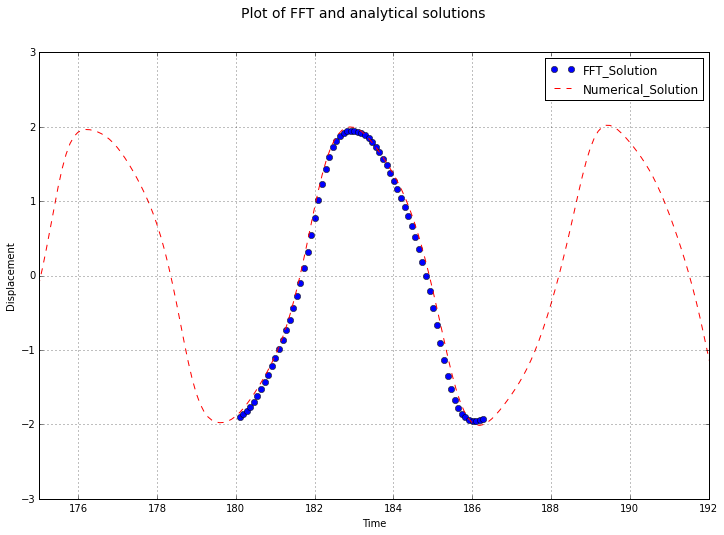

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 1

#x0=1.5*np.ones(N-1)
#x0=1.48*np.cos(1*t)
x0=1.5*np.sin(4*t)*np.cos(1*t)

f = F*np.cos(1*t)*np.sin(4*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos(1*t)*np.sin(4*t)])

time=np.linspace(0.0,200,2000)
xinit=np.array([-2, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((57.325*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:,0] , 'r--', label = 'Numerical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of FFT and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([175, 192, -3, 3])
plt.grid()
plt.show()

Numerical results in the above plot match well with numerical integration results. There is a small deviation between two results that can be due to:

- Optimization function error.
- Small aspects of the transient response is still present in the numerical integration solution at the 180 second mark.

# Solution to Van der Pol oscilator #2:

The Van der Pol oscillator is used again this time with a different forcing funcion.

## $$\ddot{x} + (x^2 - 1)\dot{x} + x = Fcos(2\pi t)$$

         Current function value: 0.144055
         Iterations: 310
         Function evaluations: 18984
         Gradient evaluations: 372
Values of x after optimization:
[-1.7877264  -1.65307377 -1.50045311 -1.34834808 -1.21199284 -1.09396301
 -0.98008008 -0.84535451 -0.6658102  -0.4296989  -0.14175158  0.17971204
  0.51121653  0.83380315  1.1382936   1.42072071  1.67183902  1.87260159
  2.00261653  2.05360848  2.03515183  1.97088047  1.88968704  1.81579707
  1.7596799   1.7142802   1.65992843  1.57649848  1.45498135  1.30187337
  1.13481497  0.97259629  0.82389205  0.68043402  0.51908679  0.31251003
  0.04276909 -0.28828616 -0.65517843 -1.0147665  -1.32473731 -1.5651476
 -1.74290099 -1.87498288 -1.97016622 -2.02394343 -2.02806357 -1.98103346
 -1.8954152 ]


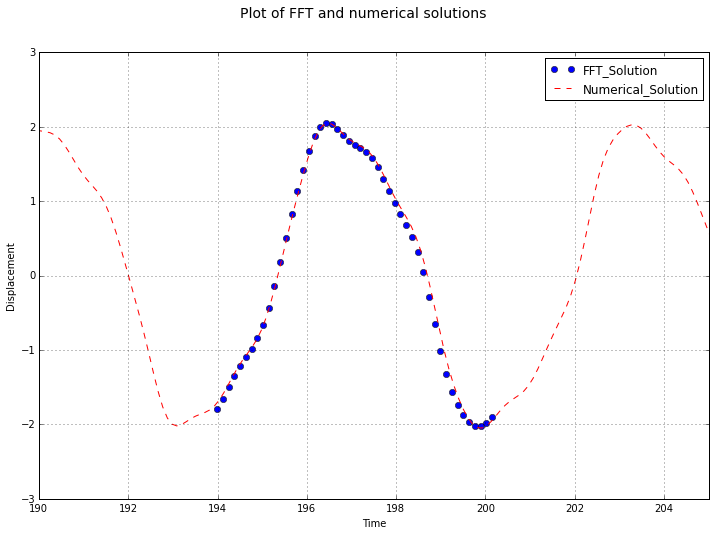

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 2

#x0=1*np.ones(N-1)
x0=1*np.cos((2*np.pi*t)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = F*np.cos((2*np.pi*t))
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos((2*np.pi*t))])

time=np.linspace(0.0,210,2000)
xinit=np.array([-2.0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure(figsize = (12,8))
plt.plot((61.75*np.pi)+t, sol.x, 'bo', label = 'FFT_Solution') #FFT solution plot
plt.plot(time, x[:,0] , 'r--', label = 'Numerical_Solution') #analytical steady state solution to the above posed problem
plt.legend(loc = 'upper right')
fig.suptitle('Plot of FFT and numerical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([190, 205, -3, 3])
plt.grid()
plt.show()

Numerical results in the above plot match well with numerical integration results. There is a small deviation between two results that can be due to:

- Optimization function error.
- Small aspects of the transient response is still present in the numerical integration solution at the 180 second mark.

# Fitting FFT results with cosine Fourier series

Addtional goal of the project is to use optimized results and attempt to generate an approximate function for the solution that can further be of use for additonal analysis. There are a few ways to accomplish this feat. While the optimized Fourier coefficients can be used to generate a functon, it was desireable to use other python methods in order to facilitate additional learning. Method used below is a fitting scheme that uses time domain $x$ in order to generate the complementary function using a Fourier cosine series. Method below is crude but it can be easily optimized for better usability.  

Assumed solution has 8 terms:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) +  A_8cos(8\omega t + 8\beta)$

Here, the coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$, $A_5$, $A_6$, $A_7$, $A_8$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting. The following procedure was used to obtian the solution:

1. Define error function to be minimized using the least squares function. The function must minimize the difference between the FFT results $(x)$ and the assumed solution form by calculating appropriate values for the above mentioned coefficients.

2. Make initial guess for the closed form solution coefficients, in this case 1

3. Run the least squares minimization scheme to minimize the error from the residual function

4. Simplify closed form and plot solution to check accuracy

This is a way to develop and approximate solution to the governing parameters. It can be a useful tool provided that the approximate solution provides a close enough approximation. The code for this is given.

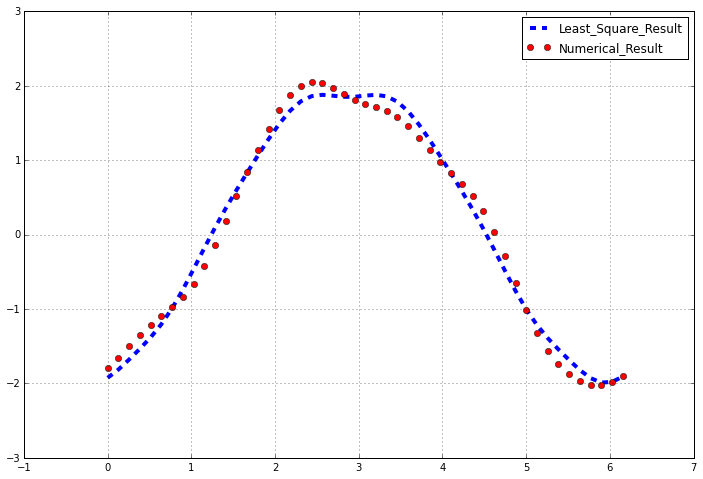

Coefficient values listed below
[ 0.11721937 -1.97111339 -0.11427528  0.03877161 -0.03371013  0.01572153
 -0.03638984 -0.00500907 -0.00485335  1.02486243  0.1883517 ]


In [9]:
#Define function to be called in the "leastsq" function
# sol.x is the method of harmonic balance solution
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4, label = 'Least_Square_Result')
plt.plot(t, sol.x, 'ro', label = 'Numerical_Result')
plt.legend(loc = 'upper right')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

Plot above shows the FFT results with respect to the fitted function. The resulting fit is farily close but some inconsistencies occur predominantly at the top of the response. This is most likely due to the fact that higher freqnency responses are present, which are not captured using a 8 term guess function.

In [10]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans            

         ⎛51⋅t    19⎞         ⎛51⋅t   19⎞      ⎛153⋅t    57⎞        ⎛102⋅t   1
  197⋅cos⎜──── + ───⎟   11⋅cos⎜──── + ──⎟   cos⎜───── + ───⎟   3⋅cos⎜───── + ─
         ⎝ 50    100⎠         ⎝ 25    50⎠      ⎝  50    100⎠        ⎝  25    2
- ─────────────────── - ───────────────── + ──────────────── - ───────────────
          100                  100                 25                 100     

9⎞      ⎛51⋅t   19⎞      ⎛153⋅t   57⎞      ⎛357⋅t   133⎞     
─⎟   cos⎜──── + ──⎟   cos⎜───── + ──⎟   cos⎜───── + ───⎟     
5⎠      ⎝ 10    20⎠      ⎝  25    50⎠      ⎝  50    100⎠   3 
── + ────────────── - ─────────────── - ──────────────── + ──
           50                25               100          25

# Conclusions

Applications of the method of harmonic balance were introduced. A python script was written using the method of harmonic balance to solve for a linear system. Once accomplished, complex nonlinearities were introduced into other governing systems and the method was used to approximate those solutions. The approximations given by the method of harmonic balance were only at the systems steady state and over one period. 

The Duffing oscilator and Van der Pol equation were the nonlinear systems used in this study. The approximations for both systems showed comparable levels of fidelity with respect to time integration results, which further validates this method. The accuracy of each approximation was confirmed by plotting against the time integration solution. Based on the accuracy of each approximation it can be stated that the method of harmonic balance was successfully applied to each of the presented linear and nonlinear systems.

Finally, a cosine Fourier series fit for the second variation of the Van der Pol equation was approximated by using the least squares method. This was done to show that the method of harmonic balance can be used to develop an approximate closed form model to describe a wide range of nonlinear systems. 

In [70]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')